군집 알고리즘

In [2]:
url = '/content/drive/MyDrive/data/fruits_300.npy'
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load(url)
fruits.shape


(300, 100, 100)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
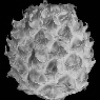

In [6]:
fruits[100]

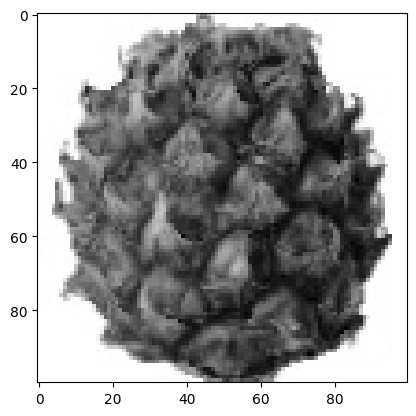

In [9]:
plt.imshow(fruits[100], cmap='gray_r')
plt.show()

In [13]:
fruits[100,50,:]

array([  3,   2,   2,   1,   2, 109,  79,  16,   1,  54, 114, 136, 131,
       120, 120, 127, 138, 139, 110,  84,  84,  89, 114, 148, 121, 121,
       133, 149, 140, 123, 133, 144, 112,  70,  88, 118, 120, 129, 137,
       131, 135, 144, 121, 128, 157, 164, 177, 175, 177, 182, 174, 158,
       150, 142, 148, 157, 134, 113, 104, 139, 117, 110, 122, 127, 129,
       143, 175, 186, 196, 191, 180, 175, 169, 167, 176, 184, 176, 181,
       177, 173, 167, 177, 187, 146, 180, 188, 193, 199, 183, 172, 103,
        61, 110,  72,   2,   3,   1,   1,   1,   1], dtype=uint8)

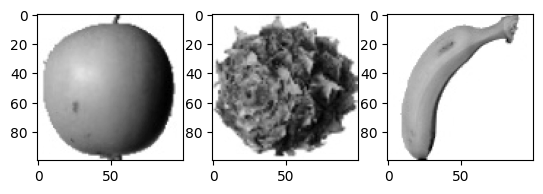

In [18]:
plt.subplot(1,3,1)
plt.imshow(fruits[10], cmap='gray_r')
plt.subplot(1,3,2)
plt.imshow(fruits[110], cmap='gray_r')
plt.subplot(1,3,3)
plt.imshow(fruits[210], cmap='gray_r')
plt.show()

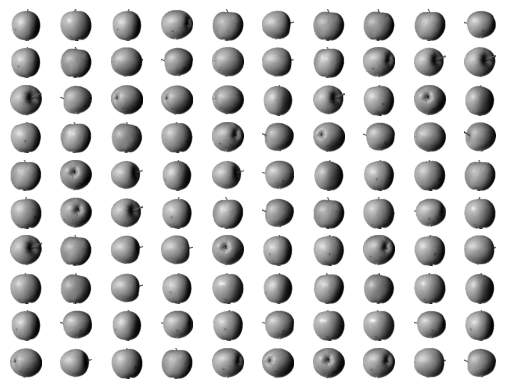

In [59]:

for i in range(100):
  plt.subplot(10,10,i+1)  # 1 ~ 100
  plt.imshow(fruits[i+0], cmap='gray_r')
  plt.axis('off')
plt.show()

이미지 픽셀데이터를 가지고 비슷한(같은부류) 이미지를 분류 -클러스터링-군집
  - 같은 종류의 군집(이미지)의 픽셀값의 평균
  - 분류작업을 할때 각 이미지의 평균값과 군집의 평균값을 비교해서 가장 오차가 작은 군집에 포함된다

In [48]:
# 각 군집의 평균을 구하세요
# 0 ~ 99 까지의 데이터 - 평균
fruits_1_data = fruits[:100].mean(axis=0)
fruits_2_data = fruits[100:200].mean(axis=0)
fruits_3_data = fruits[200:].mean(axis=0)
mean_each_fruit =  np.mean(fruits_1_data),np.mean(fruits_2_data),np.mean(fruits_3_data)
mean_each_fruit  # 사과들의평균픽셀값, 파인애플, 바나나

(92.98773600000001, 96.260623, 34.597277)

In [58]:
sample_1 = np.array(
    [
      [[1,1,1],[2,2,2]],
      [[1,1,1],[2,2,2]],
      [[1,1,1],[2,2,2]],
      [[1,1,1],[2,2,2]],
      [[1,1,1],[2,2,2]]
    ]

)
print(sample_1.shape)
print(sample_1.mean(axis=0))

(5, 2, 3)
[[1. 1. 1.]
 [2. 2. 2.]]


In [47]:
# 평균값과 가까운 사진 고르기 - 분류하기- 군집
# 2차원이미지의 평균값-- 총 300
fruits_mean = np.mean(fruits,axis=(1,2))
fruits_mean.shape

(300,)

In [65]:
# mean_each_fruit이 기준이고 이 기준과 각 평균값과의 차이가 가장작은 기준은
print(np.abs(mean_each_fruit - fruits_mean[200]))  # 각 군집의 평균과 대상의 평균의 차이를 구한다.(절대값)
np.argmin(np.abs(mean_each_fruit - fruits_mean[200])) # 그 차이가 가장작은 인덱스

[73.439036 76.711923 15.048577]


2

In [72]:
fruits_mean.shape, np.array(mean_each_fruit).shape

((300,), (3,))

In [78]:
fruits_mean = fruits_mean.reshape(-1,1)
np.abs(fruits_mean - np.array(mean_each_fruit)).shape

(300, 3)

In [79]:
temp = np.abs(fruits_mean - np.array(mean_each_fruit))
print(temp.shape)

(300, 3)


In [85]:
predict_class = np.argmin(temp,axis=1)
predict_class

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
# class가 0인 항목 몇개?
print(np.sum(predict_class==0), np.sum(predict_class==1), np.sum(predict_class==2) )

82 120 98


In [84]:
y = np.array([0]*100 + [1]*100 + [2]*100)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predict_class)

0.7733333333333333

k-mean 적용

In [95]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,n_init='auto')
print(fruits.shape, np.ndim(fruits) )
km.fit(fruits)  # ValueError: Found array with dim 3. KMeans expected <= 2.

(300, 100, 100) 3


ValueError: Found array with dim 3. KMeans expected <= 2.

In [93]:
# 차수를 변경할때는 reshape를 사용한다
fruits_2d = fruits.reshape(300,-1)
fruits_2d.shape

(300, 10000)

In [96]:
km.fit(fruits_2d)

KMeans(n_clusters=3, n_init='auto')

In [97]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [102]:
y_predict = km.predict(fruits_2d)
y = np.array([2]*100 + [0]*100 + [1]*100)
accuracy_score(y,y_predict)

0.9633333333333334

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [150]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets


In [151]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [152]:
# 데이터 전처리
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [153]:
# 범주형 데이터 object 타입의 데이터를 인코딩
from sklearn.preprocessing import LabelEncoder
# 범주형 피처 선택
object_columns = X.select_dtypes(include=['object']).columns
# 범주형 피처 인코딩
label_encoder = LabelEncoder()
for column in object_columns:
    X[column] = label_encoder.fit_transform(X[column])

<ipython-input-153-0f0df87a3e71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-153-0f0df87a3e71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-153-0f0df87a3e71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [156]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.01191369, -0.52212439, -0.87558934, ...,  0.56199675,
         1.4191716 ,  0.50333674],
       [-1.01191369, -0.52212439, -1.94759928, ..., -1.08062463,
        -0.52115952,  0.50333674],
       [ 0.98822657, -0.20688898,  1.05402854, ...,  0.56199675,
        -2.46149063,  0.50333674],
       ...,
       [-1.01191369, -0.28190933,  0.54167211, ..., -0.01901815,
        -0.52115952,  0.50333674],
       [-1.01191369,  0.00777624,  0.40492652, ..., -0.11799101,
        -0.52115952,  0.50333674],
       [-1.01191369, -0.10211908,  0.39834438, ...,  0.09243207,
        -0.52115952,  0.50333674]])

In [201]:
# k means 클러스터링 적용
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,n_init='auto')
km.fit(X_scaled)

KMeans(n_clusters=2, n_init='auto')

In [202]:
X['custer'] = km.predict(X_scaled)

In [203]:
X.groupby('custer').mean()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
custer,,,,,,,,,,,,,,,,
0,0.865317,24.276340,1.765269,97.537357,0.903169,0.934859,2.349996,2.781067,1.943662,0.021127,2.134421,0.018486,1.254193,0.696169,2.218310,2.250000
1,0.087179,24.354848,1.627585,73.826391,0.717949,0.824615,2.499492,2.574430,1.761026,0.020513,1.860728,0.076923,0.726129,0.613238,2.327179,2.499487


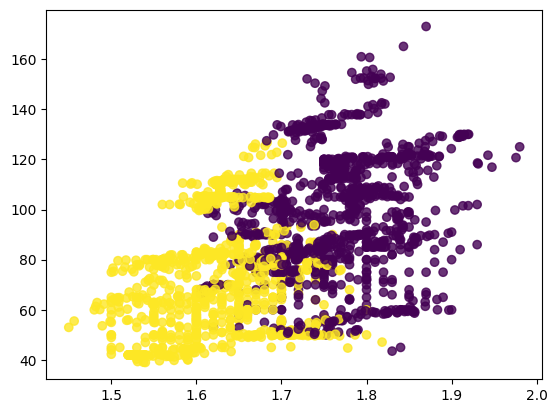

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(X['Height'],X['Weight'],c=X['custer'],alpha = 0.8)
plt.show()


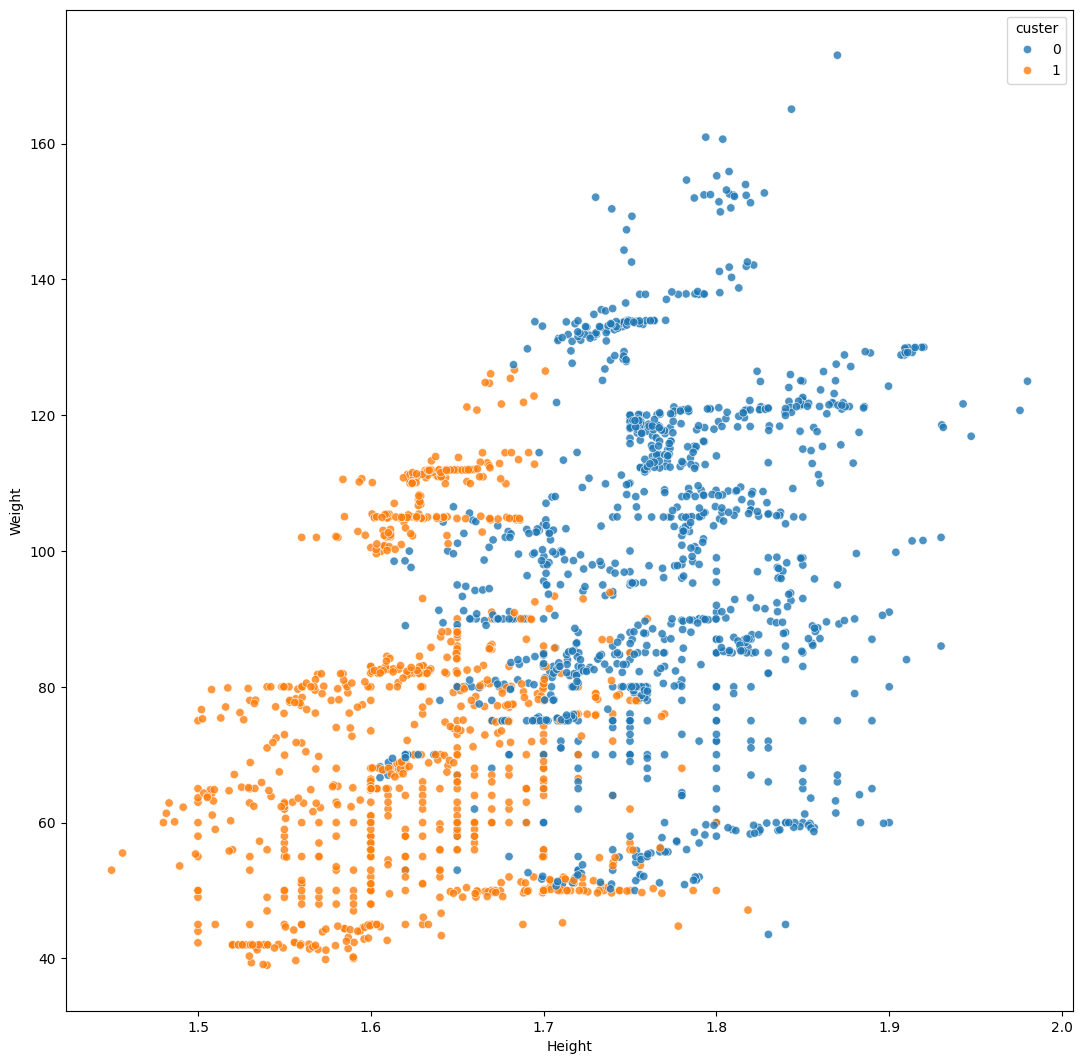

In [208]:
plt.figure(figsize=(13,13))
sns.scatterplot(data=X,x='Height',y='Weight',hue='custer',alpha=0.8)
plt.show()

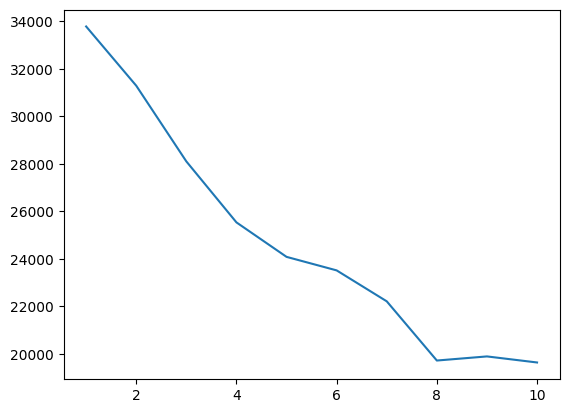

In [206]:
# 최적의 k 개수 엘보우 기법
inertia = []
for k in range(1,11):
  km = KMeans(n_clusters=k,n_init='auto')
  km.fit(X_scaled)
  inertia.append(km.inertia_)

plt.plot(range(1,11),inertia)
plt.show()
